In [1]:
import numpy as np
from pygamma.continuum import Continuum
from pygamma.dissimilarity import Categorical_Dissimilarity, Positional_Dissimilarity, Combined_Dissimilarity
from pygamma.alignement import Unitary_Alignement, Alignement, Best_Alignement

from pyannote.core import Annotation, Segment
from pyannote.core import notebook
from matplotlib import pyplot as plt

# plot
# figure, ax = plt.subplots()
# notebook.plot_annotation(annotation, ax=ax, time=True, legend=True)

In [2]:
continuum = Continuum()

In [3]:
annotation = Annotation(uri='my_video_file', modality='speaker')

In [4]:
annotation = Annotation()
annotation[Segment(1, 5)] = 'Carol'
annotation[Segment(6, 8)] = 'Bob'
annotation[Segment(12, 18)] = 'Carol'
annotation[Segment(7, 20)] = 'Alice'
continuum['liza'] = annotation

In [5]:
annotation = Annotation()
annotation[Segment(1, 5)] = 'Carol'
annotation[Segment(6, 8)] = 'Bob'
annotation[Segment(12, 18)] = 'Carol'
annotation[Segment(7, 20)] = 'Alice'
annotation[Segment(22, 23)] = 'Alice'

continuum['pierrot'] = annotation

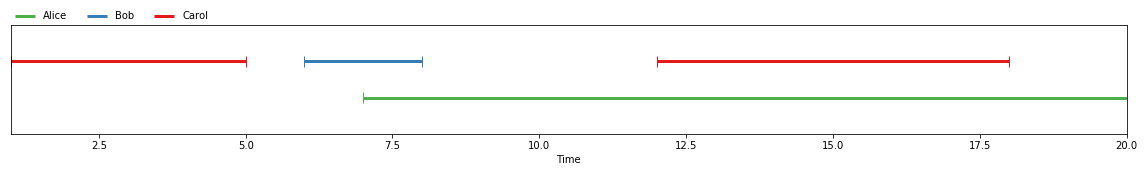

In [6]:
continuum['liza']

In [7]:
continuum.avg_num_annotations_per_annotator


4.5

In [8]:
num_categories =5
cat = np.array([[0, 0.5, 0.3, 0.7], [0.5, 0., 0.6, 0.4], [0.3, 0.6, 0., 0.7],
           [0.7, 0.4, 0.7, 0.]])
type(cat)

numpy.ndarray

In [9]:
continuum.num_units/len(continuum)

4.5

In [10]:
unit = annotation[list(annotation.itersegments())[0]]

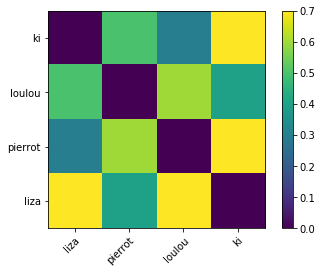

In [11]:
# plt.imshow(cat)
fig, ax = plt.subplots()

categories = ['liza','pierrot','loulou','ki']
im = plt.imshow(cat, extent=[0,4,0,4])
ax.figure.colorbar(im, ax=ax)
# plt.colorbar(orientation="horizontal")

plt.xticks([el+0.5 for el in range(len(categories))], categories)
plt.yticks([el+0.5 for el in range(len(categories))], categories)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.show()

In [12]:
cat_dis = Categorical_Dissimilarity('diarization', list_categories=categories, categorical_dissimlarity_matrix=cat)

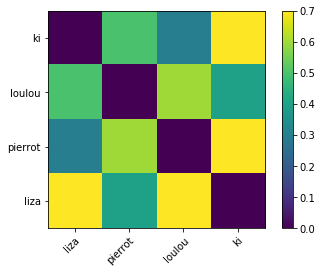

In [13]:
cat_dis.plot_categorical_dissimilarity_matrix()

In [14]:
cat_dis.categorical_dissimlarity_matrix[2][3]

0.7

In [15]:
# pos_dis = Positional_Dissimilarity('diarization')
# last_unit = unit
# for unit in annotation.itertracks():
#     print(unit[0], annotation[unit], pos_dis[[unit,last_unit]], pos_dis[[last_unit,unit]])

In [16]:
type(['loulou','loulou']) == list

True

In [17]:
continuum = Continuum()
annotation = Annotation()
annotation[Segment(1, 5)] = 'Carol'
annotation[Segment(6, 8)] = 'Bob'
annotation[Segment(12, 18)] = 'Carol'
annotation[Segment(7, 20)] = 'Alice'
continuum['liza'] = annotation
annotation = Annotation()
annotation[Segment(2, 6)] = 'Carol'
annotation[Segment(7, 8)] = 'Bob'
annotation[Segment(12, 18)] = 'Alice'
annotation[Segment(8, 10)] = 'Alice'
annotation[Segment(7, 19)] = 'Jeremy'
continuum['pierrot'] = annotation
categories = ['Carol', 'Bob', 'Alice', 'Jeremy']

pos_dis = Positional_Dissimilarity('diarization', DELTA_EMPTY=0.5)

list_dis = []
for liza_unit in continuum['liza'].itersegments():
    for pierrot_unit in continuum['pierrot'].itersegments():
        list_dis.append(pos_dis[[liza_unit, pierrot_unit]])
        print(liza_unit, pierrot_unit,pos_dis[[liza_unit, pierrot_unit]], continuum['liza'][liza_unit])

[ 00:00:01.000 -->  00:00:05.000] [ 00:00:02.000 -->  00:00:06.000] 0.03125 Carol
[ 00:00:01.000 -->  00:00:05.000] [ 00:00:07.000 -->  00:00:08.000] 1.62 Carol
[ 00:00:01.000 -->  00:00:05.000] [ 00:00:07.000 -->  00:00:19.000] 0.78125 Carol
[ 00:00:01.000 -->  00:00:05.000] [ 00:00:08.000 -->  00:00:10.000] 2.0 Carol
[ 00:00:01.000 -->  00:00:05.000] [ 00:00:12.000 -->  00:00:18.000] 2.88 Carol
[ 00:00:06.000 -->  00:00:08.000] [ 00:00:02.000 -->  00:00:06.000] 0.5 Bob
[ 00:00:06.000 -->  00:00:08.000] [ 00:00:07.000 -->  00:00:08.000] 0.05555555555555555 Bob
[ 00:00:06.000 -->  00:00:08.000] [ 00:00:07.000 -->  00:00:19.000] 0.36734693877551017 Bob
[ 00:00:06.000 -->  00:00:08.000] [ 00:00:08.000 -->  00:00:10.000] 0.5 Bob
[ 00:00:06.000 -->  00:00:08.000] [ 00:00:12.000 -->  00:00:18.000] 2.0 Bob
[ 00:00:07.000 -->  00:00:20.000] [ 00:00:02.000 -->  00:00:06.000] 0.6245674740484429 Alice
[ 00:00:07.000 -->  00:00:20.000] [ 00:00:07.000 -->  00:00:08.000] 0.36734693877551017 Alice
[

In [18]:
list_dis == [0.03125,
 1.62,
 0.78125,
 2.0,
 2.88,
 0.5,
 0.05555555555555555,
 0.36734693877551017,
 0.5,
 2.0,
 0.6245674740484429,
 0.36734693877551017,
 0.0008,
 0.26888888888888884,
 0.06786703601108032,
 2.4200000000000004,
 2.2959183673469385,
 0.05555555555555555,
 1.125,
 0.0]

True

In [19]:
continuum = Continuum()
annotation = Annotation()
annotation[Segment(1, 5)] = 'Carol'
annotation[Segment(6, 8)] = 'Bob'
annotation[Segment(12, 18)] = 'Carol'
annotation[Segment(7, 20)] = 'Alice'
continuum['liza'] = annotation
annotation = Annotation()
annotation[Segment(2, 6)] = 'Carol'
annotation[Segment(7, 8)] = 'Bob'
annotation[Segment(12, 18)] = 'Alice'
annotation[Segment(8, 10)] = 'Alice'
annotation[Segment(7, 19)] = 'Jeremy'
continuum['pierrot'] = annotation
categories = ['Carol', 'Bob', 'Alice', 'Jeremy']

combi_dis = Combined_Dissimilarity(
    'diarization',
    list_categories=categories,
    DELTA_EMPTY=0.5,
    categorical_dissimlarity_matrix=cat)
list_dis = []
for liza_unit in continuum['liza'].itersegments():
    for pierrot_unit in continuum['pierrot'].itersegments():
        list_dis.append(combi_dis[[liza_unit, pierrot_unit], [
            continuum['liza'][liza_unit], continuum['pierrot'][
                pierrot_unit]
        ]])
        print(combi_dis[[liza_unit, pierrot_unit], [
            continuum['liza'][liza_unit], continuum['pierrot'][
                pierrot_unit]
        ]])

0.03125
1.87
1.13125
2.15
3.03
0.75
0.05555555555555555
0.5673469387755101
0.8
2.3
0.774567474048443
0.6673469387755102
0.3508
0.26888888888888884
0.06786703601108032
2.4200000000000004
2.5459183673469385
0.40555555555555556
1.275
0.15


In [20]:
list(continuum['liza'].itersegments())

[<Segment(1, 5)>, <Segment(6, 8)>, <Segment(7, 20)>, <Segment(12, 18)>]

In [21]:
list(continuum['pierrot'].itersegments())

# continuum['pierrot'][1]

[<Segment(2, 6)>,
 <Segment(7, 8)>,
 <Segment(7, 19)>,
 <Segment(8, 10)>,
 <Segment(12, 18)>]

In [22]:
n_tuple = (['liza',Segment(12, 18)],['pierrot',Segment(12, 18)])
unitary_alignement= Unitary_Alignement(continuum, n_tuple, combi_dis)

In [23]:
unitary_alignement.disorder

0.15

In [24]:
list(annotation.itersegments())

[<Segment(2, 6)>,
 <Segment(7, 8)>,
 <Segment(7, 19)>,
 <Segment(8, 10)>,
 <Segment(12, 18)>]

In [25]:
continuum = Continuum()
annotation = Annotation()
annotation[Segment(1, 5)] = 'Carol'
annotation[Segment(6, 8)] = 'Bob'
annotation[Segment(12, 18)] = 'Carol'
annotation[Segment(7, 20)] = 'Alice'
continuum['liza'] = annotation
annotation = Annotation()
annotation[Segment(2, 6)] = 'Carol'
annotation[Segment(7, 8)] = 'Bob'
annotation[Segment(12, 18)] = 'Alice'
annotation[Segment(8, 10)] = 'Alice'
annotation[Segment(7, 19)] = 'Jeremy'
continuum['pierrot'] = annotation
annotation = Annotation()

annotation[Segment(1, 6)] = 'Carol'
annotation[Segment(8, 10)] = 'Alice'
annotation[Segment(7, 19)] = 'Jeremy'
annotation[Segment(19, 20)] = 'Alice'

continuum['hadrien'] = annotation

categories = ['Carol', 'Bob', 'Alice', 'Jeremy']

combi_dis = Combined_Dissimilarity(
    'diarization',
    list_categories=categories,
    DELTA_EMPTY=0.5,
    categorical_dissimlarity_matrix=cat)
list_dis = []
for liza_unit in continuum['liza'].itersegments():
    for pierrot_unit in continuum['pierrot'].itersegments():
        list_dis.append(combi_dis[[liza_unit, pierrot_unit], [
            continuum['liza'][liza_unit], continuum['pierrot'][
                pierrot_unit]
        ]])
#         print(combi_dis[[liza_unit, pierrot_unit], [
#             continuum['liza'][liza_unit], continuum['pierrot'][
#                 pierrot_unit]
#         ]])

In [26]:
print(continuum['liza'])

[ 00:00:01.000 -->  00:00:05.000] _ Carol
[ 00:00:06.000 -->  00:00:08.000] _ Bob
[ 00:00:07.000 -->  00:00:20.000] _ Alice
[ 00:00:12.000 -->  00:00:18.000] _ Carol


In [27]:
print(continuum['pierrot'])


[ 00:00:02.000 -->  00:00:06.000] _ Carol
[ 00:00:07.000 -->  00:00:08.000] _ Bob
[ 00:00:07.000 -->  00:00:19.000] _ Jeremy
[ 00:00:08.000 -->  00:00:10.000] _ Alice
[ 00:00:12.000 -->  00:00:18.000] _ Alice


In [28]:
print(continuum['hadrien'])

[ 00:00:01.000 -->  00:00:06.000] _ Carol
[ 00:00:07.000 -->  00:00:19.000] _ Jeremy
[ 00:00:08.000 -->  00:00:10.000] _ Alice
[ 00:00:19.000 -->  00:00:20.000] _ Alice


In [29]:
n_tuple = (['liza',Segment(12, 18)],['pierrot',Segment(12, 18)],['hadrien', None])
unitary_alignement= Unitary_Alignement(continuum, n_tuple, combi_dis)

In [30]:
set_unitary_alignements = []

n_tuple = (['liza',Segment(1, 5)],['pierrot',Segment(2, 6)],['hadrien', Segment(1, 6)])
unitary_alignement= Unitary_Alignement(continuum, n_tuple, combi_dis)
set_unitary_alignements.append(unitary_alignement)

n_tuple = (['liza',Segment(6, 8)],['pierrot',Segment(7, 8)],['hadrien', Segment(8, 10)])
unitary_alignement= Unitary_Alignement(continuum, n_tuple, combi_dis)
set_unitary_alignements.append(unitary_alignement)

n_tuple = (['liza',Segment(7, 20)],['pierrot',Segment(7, 19)],['hadrien', Segment(7, 19)])
unitary_alignement= Unitary_Alignement(continuum, n_tuple, combi_dis)
set_unitary_alignements.append(unitary_alignement)

n_tuple = (['liza',Segment(12, 18)],['pierrot',Segment(12, 18)],['hadrien', None])
unitary_alignement= Unitary_Alignement(continuum, n_tuple, combi_dis)
set_unitary_alignements.append(unitary_alignement)

n_tuple = (['liza',None],['pierrot',Segment(8, 10)],['hadrien', Segment(19, 20)])
unitary_alignement= Unitary_Alignement(continuum, n_tuple, combi_dis)
set_unitary_alignements.append(unitary_alignement)

In [31]:
alignement = Alignement(continuum, set_unitary_alignements, combi_dis)

In [32]:
alignement.disorder

9.683583744855968

In [33]:
print(list(continuum['hadrien'].itersegments()))

print(list(continuum['pierrot'].itersegments()))
print(list(continuum['liza'].itersegments()))

def combinaisons_tuple_annotators(continuum):
    if n==1:
        return V
    answers = []
    for combo in combos(n-1):
        for word in V:
                answers.append(combo+word)
    return answers

[<Segment(1, 6)>, <Segment(7, 19)>, <Segment(8, 10)>, <Segment(19, 20)>]
[<Segment(2, 6)>, <Segment(7, 8)>, <Segment(7, 19)>, <Segment(8, 10)>, <Segment(12, 18)>]
[<Segment(1, 5)>, <Segment(6, 8)>, <Segment(7, 20)>, <Segment(12, 18)>]


In [34]:
from itertools import product
print(list(product(list(continuum['pierrot'].itersegments()), list(continuum['liza'].itersegments()), list(continuum['liza'].itersegments()) )))

[(<Segment(2, 6)>, <Segment(1, 5)>, <Segment(1, 5)>), (<Segment(2, 6)>, <Segment(1, 5)>, <Segment(6, 8)>), (<Segment(2, 6)>, <Segment(1, 5)>, <Segment(7, 20)>), (<Segment(2, 6)>, <Segment(1, 5)>, <Segment(12, 18)>), (<Segment(2, 6)>, <Segment(6, 8)>, <Segment(1, 5)>), (<Segment(2, 6)>, <Segment(6, 8)>, <Segment(6, 8)>), (<Segment(2, 6)>, <Segment(6, 8)>, <Segment(7, 20)>), (<Segment(2, 6)>, <Segment(6, 8)>, <Segment(12, 18)>), (<Segment(2, 6)>, <Segment(7, 20)>, <Segment(1, 5)>), (<Segment(2, 6)>, <Segment(7, 20)>, <Segment(6, 8)>), (<Segment(2, 6)>, <Segment(7, 20)>, <Segment(7, 20)>), (<Segment(2, 6)>, <Segment(7, 20)>, <Segment(12, 18)>), (<Segment(2, 6)>, <Segment(12, 18)>, <Segment(1, 5)>), (<Segment(2, 6)>, <Segment(12, 18)>, <Segment(6, 8)>), (<Segment(2, 6)>, <Segment(12, 18)>, <Segment(7, 20)>), (<Segment(2, 6)>, <Segment(12, 18)>, <Segment(12, 18)>), (<Segment(7, 8)>, <Segment(1, 5)>, <Segment(1, 5)>), (<Segment(7, 8)>, <Segment(1, 5)>, <Segment(6, 8)>), (<Segment(7, 8)>, <Se

In [35]:
set_of_possible_segments = []
for annotator in continuum.iterannotators():
    print(annotator)
    set_of_possible_segments.append([[el, annotator] for el in list(continuum[annotator].itersegments())+ [None]])

hadrien
liza
pierrot


In [36]:
len(list(product(*set_of_possible_segments)))# list(set_of_possible_segments[0])

150

In [37]:
import cvxpy as cp

# Create two scalar optimization variables.
x = cp.Variable()
y = cp.Variable()

# Create two constraints.
constraints = [x + y == 1,
               x - y >= 1]

# Form objective.
obj = cp.Minimize((x - y)**2)

# Form and solve problem.
prob = cp.Problem(obj, constraints)
prob.solve()

# The optimal dual variable (Lagrange multiplier) for
# a constraint is stored in constraint.dual_value.
print("optimal (x + y == 1) dual variable", constraints[0].dual_value)
print("optimal (x - y >= 1) dual variable", constraints[1].dual_value)
print("x - y value:", (x - y).value)


optimal (x + y == 1) dual variable 0.0
optimal (x - y >= 1) dual variable 2.0
x - y value: 1.0


In [38]:
d = np.array([0.3, 0.5, 8, 15, 9])
x = cp.Variable(shape=d.shape, boolean=True)
A = np.random.randint(2, size=(5,d.shape[0]))

obj = cp.Minimize(d.T * x)

constraints = [A*x == 1]

prob = cp.Problem(obj, constraints)


In [39]:
print( "Optimal value", prob.solve())
print( "Optimal var")
print( x.value) # A numpy matrix.

Optimal value None
Optimal var
None


In [40]:
prob

Problem(Minimize(Expression(AFFINE, NONNEGATIVE, ())), [Equality(Expression(AFFINE, NONNEGATIVE, (5,)), Constant(CONSTANT, NONNEGATIVE, ()))])

In [41]:
x.value

In [42]:
(A*x)

Expression(AFFINE, NONNEGATIVE, (5,))

In [43]:
best_alignement = Best_Alignement(continuum, combi_dis)

In [44]:
A, obj, d, x = best_alignement.get_unitary_alignements_best()

In [45]:
A.shape

(13, 28)

In [46]:
obj = cp.Minimize(d.T * x)

constraints = [A*x == 1]

prob = cp.Problem(obj, constraints)
print( "Optimal value", prob.solve())
print( "Optimal var")
print( x.value) # A numpy matrix.

Optimal value 1.390668977689775
Optimal var
[ 1.00000000e+00  4.36187858e-11  4.36187858e-11  1.27724627e-10
  7.83674084e-14  9.11259870e-13 -2.68591855e-12 -6.33912563e-12
 -1.20025545e-11  1.00000000e+00  3.78384006e-11  6.32273787e-12
  1.00942074e-10  1.41208689e-11  8.93432301e-12  2.61054694e-11
 -3.23622583e-12 -6.32119316e-12  1.00000000e+00  1.00000000e+00
  1.01871904e-10  4.36193170e-11  1.00000000e+00 -2.01753996e-12
  2.03843451e-12 -5.20880407e-12  1.57995739e-10  6.47573653e-11]


In [47]:
d.shape

(28,)

In [48]:
x.shape

(28,)